<a href="https://colab.research.google.com/github/prathakkumar/i3systems/blob/main/i3systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [ ]:
!nvidia-smi

Tue Jun  8 16:45:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Case_Study_Data_Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Case_Study_Data_Test.csv')

In [ ]:
train.head()

,Package,Sample,Medical_Description
0,Neurosurgery,VP Shunt Placement,"TITLE OF OPERATION: , Placement of right new v..."
1,Neurosurgery,Craniotomy - Frontal Zygomatic,"PREOPERATIVE DIAGNOSIS:, Metopic synostosis w..."
2,Neurosurgery,Wound Closure & Debridement - Hydrocephalus,"TITLE OF OPERATION:, A complex closure and de..."
3,Urology,Foul-Smelling Urine,"CHIEF COMPLAINT:, Foul-smelling urine and sto..."
4,Neurology,MRI Head,"EXAM:, MRI Head W&WO Contrast.,REASON FOR EXA..."


In [ ]:
test.head()

,Package,Sample,Medical_Description
0,Ophthalmology,"Browlift, Blepharoplasty, & Rhytidectomy","PREOPERATIVE DIAGNOSES:,1. Eyebrow ptosis.,2...."
1,Orthopedic,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO..."
2,Cardiovascular / Pulmonary,Heart Catheterization & Angiography - 1,"CLINICAL INDICATION: ,Normal stress test.,PRO..."
3,Ophthalmology,Ophthalmology - Letter - 1,"XYZ, O.D.,RE: ABC,DOB: MM/DD/YYYY,Dear Dr. X..."
4,Neurosurgery,Scott Cannula,"PROCEDURE:, Placement of Scott cannula, right ..."


## Missing Values

In [ ]:
train.isnull().sum()

Package                 0
Sample                  0
Medical_Description    15
dtype: int64

In [ ]:
train.shape

(1812, 3)

In [ ]:
train=train.dropna()

In [ ]:
train.shape

(1797, 3)

In [ ]:
train['Package'].value_counts()

 Cardiovascular / Pulmonary    334
 Orthopedic                    319
 Neurology                     201
 Gastroenterology              201
 Urology                       141
 Obstetrics / Gynecology       139
 ENT - Otolaryngology           86
 Neurosurgery                   84
 Hematology - Oncology          81
 Ophthalmology                  75
 Nephrology                     73
 Pediatrics - Neonatal          63
Name: Package, dtype: int64

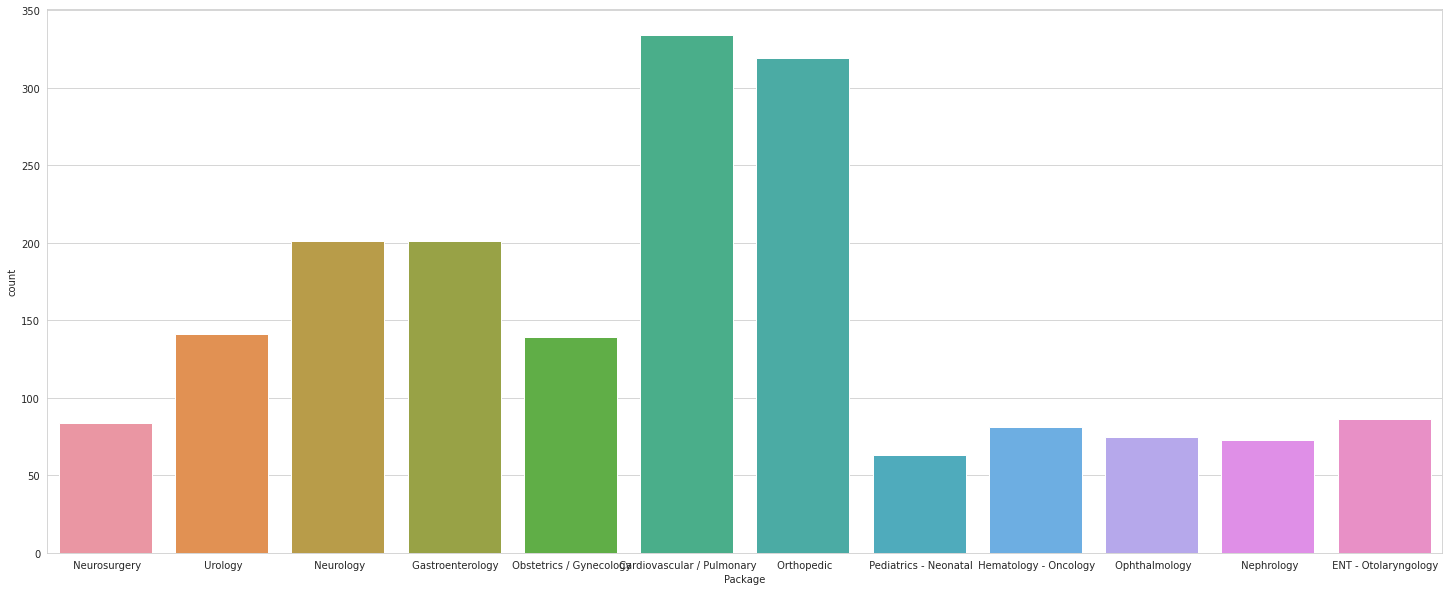

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(25, 10))
sns.countplot(x='Package',data=train)

## Data Cleaning

In [ ]:
data=train.iloc[:,1:]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

list1= [i for i in range(2)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,0,1
0,VP Shunt Placement,TITLE OF OPERATION Placement of right new v...
1,Craniotomy Frontal Zygomatic,PREOPERATIVE DIAGNOSIS Metopic synostosis w...
2,Wound Closure Debridement Hydrocephalus,TITLE OF OPERATION A complex closure and de...
3,Foul Smelling Urine,CHIEF COMPLAINT Foul smelling urine and sto...
4,MRI Head,EXAM MRI Head W WO Contrast REASON FOR EXA...


In [ ]:
for index in new_Index:
    data[index]=data[index].str.lower()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1
0,vp shunt placement,title of operation placement of right new v...
1,craniotomy frontal zygomatic,preoperative diagnosis metopic synostosis w...
2,wound closure debridement hydrocephalus,title of operation a complex closure and de...
3,foul smelling urine,chief complaint foul smelling urine and sto...
4,mri head,exam mri head w wo contrast reason for exa...


In [ ]:
medical = []
for row in range(0,len(data.index)):
    medical.append(' '.join(str(x) for x in data.iloc[row,0:2]))

## Transforming text to feature vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf=TfidfVectorizer(ngram_range=(2,2), stop_words='english')
X=Tfidf.fit_transform(medical)

# Handling Imbalance Data

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from collections import Counter
oversample = SMOTE()
y = LabelEncoder().fit_transform(train['Package'])
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=6, n=334 (8.333%)
Class=11, n=334 (8.333%)
Class=5, n=334 (8.333%)
Class=2, n=334 (8.333%)
Class=7, n=334 (8.333%)
Class=0, n=334 (8.333%)
Class=9, n=334 (8.333%)
Class=10, n=334 (8.333%)
Class=3, n=334 (8.333%)
Class=8, n=334 (8.333%)
Class=4, n=334 (8.333%)
Class=1, n=334 (8.333%)


In [ ]:
test["Package"] = LabelEncoder().fit_transform(test["Package"])
test.head()

,Package,Sample,Medical_Description
0,8,"Browlift, Blepharoplasty, & Rhytidectomy","PREOPERATIVE DIAGNOSES:,1. Eyebrow ptosis.,2...."
1,9,Lumbar Discogram,"PREOPERATIVE DIAGNOSIS: , Low back pain.,POSTO..."
2,0,Heart Catheterization & Angiography - 1,"CLINICAL INDICATION: ,Normal stress test.,PRO..."
3,8,Ophthalmology - Letter - 1,"XYZ, O.D.,RE: ABC,DOB: MM/DD/YYYY,Dear Dr. X..."
4,6,Scott Cannula,"PROCEDURE:, Placement of Scott cannula, right ..."


In [ ]:
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,1:3]))
test_dataset = Tfidf.transform(test_transform)

# SVM

In [ ]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(X,y)
predictions = model2.predict(test_dataset)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[36  0  0  0  0  0  0  0  0  0  1  0]
 [ 2  8  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 20  0  1  0  0  0  0  0  0  0]
 [ 1  0  1  2  0  2  0  2  0  0  1  0]
 [ 2  0  0  0  4  0  0  0  0  0  0  2]
 [ 2  0  0  1  0 10  2  0  0  7  0  0]
 [ 0  0  0  0  0  2  4  0  0  4  0  0]
 [ 1  0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  1  0  5  4  0  0 26  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  2  3]
 [ 1  0  0  0  2  0  0  0  0  0  0 13]]
0.7326732673267327
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        37
           1       0.89      0.80      0.84        10
           2       0.95      0.87      0.91        23
           3       0.50      0.22      0.31         9
           4       0.57      0.50      0.53         8
           5       0.50      0.45      0.48        22
           6       0.40      0.40      0.40        10
           7       0.88      0.94      0.91        16
           8       1.00  

In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model2,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.84289277 0.85037406 0.8553616  0.83541147 0.86783042 0.83291771
 0.73316708 0.51371571 0.9525     0.87      ]
0.8154170822942642


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear']
C = [0.001, 0.01, 0.1, 1, 2]
gamma = [0.001, 0.01, 0.1, 1, 2]

random_grid = {'kernel': kernel,
               'C': C,
               'gamma': gamma,
               }
print(random_grid)

{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 2], 'gamma': [0.001, 0.01, 0.1, 1, 2]}


In [ ]:
sv=SVC()
sv_randomcv=RandomizedSearchCV(estimator=sv,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
sv_randomcv.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 2],
                                        'gamma': [0.001, 0.01, 0.1, 1, 2],
                                        'kernel': ['linear']},
                   pre_dispatch='2*n_jobs', random_state=100, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
sv_randomcv.best_estimator_

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
sv_randomcv.best_params_

{'C': 2, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
from sklearn.svm import SVC
model = SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model.fit(X,y)
predictions = model.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[36  0  0  0  0  0  0  0  0  0  1  0]
 [ 2  8  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 20  0  1  0  0  0  0  0  0  0]
 [ 1  0  1  2  0  2  0  2  0  0  1  0]
 [ 2  0  0  0  4  0  0  0  0  0  0  2]
 [ 1  0  0  1  0 10  3  0  0  7  0  0]
 [ 0  0  0  0  0  2  4  0  0  4  0  0]
 [ 1  0  0  0  0  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  1  0  5  4  0  0 26  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  2  3]
 [ 1  0  0  0  2  0  0  0  0  0  0 13]]
0.7326732673267327
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.89      0.80      0.84        10
           2       0.95      0.87      0.91        23
           3       0.50      0.22      0.31         9
           4       0.57      0.50      0.53         8
           5       0.50      0.45      0.48        22
           6       0.36      0.40      0.38        10
           7       0.88      0.94      0.91        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.85037406 0.8478803  0.8478803  0.82294264 0.88279302 0.86783042
 0.78054863 0.5436409  0.9525     0.8425    ]
0.8238890274314213


# Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=1)
classifier.fit(X,y)
predictions = classifier.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[30  1  0  2  1  0  1  0  0  0  2  0]
 [ 0  9  0  0  0  0  0  0  0  0  1  0]
 [ 1  0 15  2  2  0  0  0  0  0  2  1]
 [ 1  0  1  4  0  1  0  1  0  0  1  0]
 [ 1  0  0  0  5  0  0  0  0  0  0  2]
 [ 1  0  0  2  0 10  2  0  0  6  1  0]
 [ 0  0  0  0  0  1  8  0  0  1  0  0]
 [ 0  0  0  0  1  0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  1  0  1  0  5  5  0  0 24  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  3  3]
 [ 0  0  0  0  2  0  0  0  0  0  0 14]]
0.7178217821782178
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        37
           1       0.82      0.90      0.86        10
           2       0.94      0.65      0.77        23
           3       0.36      0.44      0.40         9
           4       0.45      0.62      0.53         8
           5       0.56      0.45      0.50        22
           6       0.50      0.80      0.62        10
           7       0.94      0.94      0.94        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(classifier,X,y,cv=kfold_validation,)
print(results)
print(np.mean(results))

[0.72817955 0.74563591 0.72568579 0.70074813 0.69326683 0.48379052
 0.28927681 0.33167082 0.765      0.6025    ]
0.6065754364089775


In [ ]:
alpha = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 
         0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 
         0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

random_grid = {'alpha': alpha
               }
print(random_grid)

{'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [ ]:
mnb=MultinomialNB()
mnb_randomcv=RandomizedSearchCV(estimator=mnb,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
mnb_randomcv.fit(X,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.002, 0.003, 0.004,
                                                  0.005, 0.006, 0.007, 0.008,
                                                  0.009, 0.01, 0.02, 0.03, 0.04,
                                                  0.05, 0.06, 0.07, 0.08, 0.09,
                                                  0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9, 1.0]},
                   pre_dispatch='2*n_jobs', random_state=100, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
mnb_randomcv.best_estimator_

MultinomialNB(alpha=0.006, class_prior=None, fit_prior=True)

In [ ]:
mnb_randomcv.best_params_

{'alpha': 0.006}

In [ ]:
classifier=MultinomialNB (alpha=0.006,fit_prior=True,class_prior=None)
classifier.fit(X,y)
predictions = classifier.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[34  0  0  2  0  0  0  0  0  0  1  0]
 [ 1  8  0  0  0  1  0  0  0  0  0  0]
 [ 2  0 19  0  1  1  0  0  0  0  0  0]
 [ 1  0  1  3  0  1  0  2  0  0  1  0]
 [ 1  0  0  0  5  0  0  0  0  0  0  2]
 [ 0  0  0  1  0 10  3  0  0  7  0  1]
 [ 0  0  0  0  0  1  5  0  0  4  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  1  0  5  4  0  0 26  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  2  3]
 [ 0  0  0  0  2  0  0  0  0  0  0 14]]
0.7425742574257426
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.89      0.80      0.84        10
           2       0.95      0.83      0.88        23
           3       0.43      0.33      0.38         9
           4       0.62      0.62      0.62         8
           5       0.50      0.45      0.48        22
           6       0.42      0.50      0.45        10
           7       0.89      1.00      0.94        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(classifier,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.85785536 0.86284289 0.840399   0.81546135 0.89775561 0.94014963
 0.93765586 0.97256858 0.975      0.945     ]
0.9044688279301745


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtreeclassifier=DecisionTreeClassifier()
dtreeclassifier.fit(X,y)
predictions = dtreeclassifier.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[28  0  3  0  0  2  1  0  0  2  1  0]
 [ 1  7  0  0  0  1  0  0  0  0  0  1]
 [ 3  1 13  0  2  1  0  0  0  1  0  2]
 [ 1  1  1  3  0  1  0  2  0  0  0  0]
 [ 1  0  2  0  4  0  0  0  0  0  0  1]
 [ 3  0  0  2  0  7  2  0  0  7  0  1]
 [ 0  0  1  0  0  2  2  0  0  5  0  0]
 [ 3  0  0  0  0  0  0 10  0  2  1  0]
 [ 0  0  0  0  0  0  0  0  7  1  0  0]
 [ 4  0  0  1  1  6  5  0  0 19  0  0]
 [ 1  1  0  0  0  1  0  0  0  0  0  4]
 [ 2  0  0  0  3  0  0  0  0  1  1  9]]
0.5396039603960396
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        37
           1       0.70      0.70      0.70        10
           2       0.65      0.57      0.60        23
           3       0.50      0.33      0.40         9
           4       0.40      0.50      0.44         8
           5       0.33      0.32      0.33        22
           6       0.20      0.20      0.20        10
           7       0.83      0.62      0.71        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(classifier,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.85785536 0.86284289 0.840399   0.81546135 0.89775561 0.94014963
 0.93765586 0.97256858 0.975      0.945     ]
0.9044688279301745


In [ ]:
criterion = ['gini','entropy']
splitter = ['best','random']

random_grid = {'criterion': criterion,
               'splitter': splitter,
               }
print(random_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}


In [ ]:
dtree=DecisionTreeClassifier()
dtree_randomcv=RandomizedSearchCV(estimator=dtree,param_distributions=random_grid,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
dtree_randomcv.fit(X,y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   59.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [ ]:
dtree_randomcv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
dtree_randomcv.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [ ]:
dtreeclassifier=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
dtreeclassifier.fit(X,y)
predictions = dtreeclassifier.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[26  1  4  0  0  4  0  0  0  1  1  0]
 [ 1  8  0  0  0  0  0  0  0  1  0  0]
 [ 2  0 17  2  1  0  0  1  0  0  0  0]
 [ 2  0  1  2  0  2  0  2  0  0  0  0]
 [ 2  0  0  0  4  1  0  0  0  0  0  1]
 [ 2  1  0  2  0  8  2  0  0  6  0  1]
 [ 1  0  0  0  0  4  2  0  0  3  0  0]
 [ 0  0  2  0  0  3  0  9  0  1  0  1]
 [ 1  0  0  0  0  0  0  0  7  0  0  0]
 [ 2  1  1  1  0  8  3  0  0 20  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  1  4]
 [ 0  0  0  1  3  2  0  0  0  2  0  8]]
0.5544554455445545
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        37
           1       0.67      0.80      0.73        10
           2       0.68      0.74      0.71        23
           3       0.25      0.22      0.24         9
           4       0.50      0.50      0.50         8
           5       0.24      0.36      0.29        22
           6       0.29      0.20      0.24        10
           7       0.75      0.56      0.64        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(classifier,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.85785536 0.86284289 0.840399   0.81546135 0.89775561 0.94014963
 0.93765586 0.97256858 0.975      0.945     ]
0.9044688279301745


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
predictions = knn.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[ 9  3  2 10  7  1  0  0  0  0  5  0]
 [ 0  9  0  0  0  1  0  0  0  0  0  0]
 [ 1  0 14  2  2  0  1  0  0  0  2  1]
 [ 0  0  1  5  1  2  0  0  0  0  0  0]
 [ 0  0  1  1  5  0  0  0  0  0  0  1]
 [ 1  0  0  2  1 11  4  0  0  3  0  0]
 [ 0  0  0  2  0  1  7  0  0  0  0  0]
 [ 0  0  2  0  0  0  1 13  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  7  0  0  0]
 [ 0  0  2 10  1  6  8  1  0  7  1  0]
 [ 0  1  0  1  0  1  0  0  0  0  1  3]
 [ 0  0  0  2  3  0  0  0  0  0  0 11]]
0.4900990099009901
              precision    recall  f1-score   support

           0       0.82      0.24      0.38        37
           1       0.69      0.90      0.78        10
           2       0.64      0.61      0.62        23
           3       0.14      0.56      0.22         9
           4       0.25      0.62      0.36         8
           5       0.48      0.50      0.49        22
           6       0.33      0.70      0.45        10
           7       0.93      0.81      0.87        16
           8       1.00  

In [ ]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(test_dataset)
    error_rate.append(np.mean(pred_i != test['Package']))  

Text(0, 0.5, 'Error Rate')

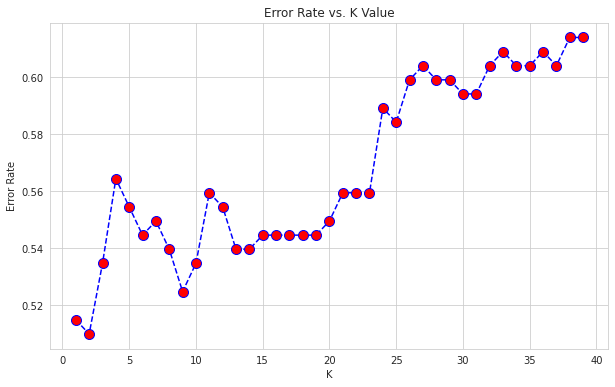

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(knn,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.41895262 0.3765586  0.36408978 0.36907731 0.22693267 0.14713217
 0.06234414 0.12219451 0.2325     0.2275    ]
0.2547281795511222


# PassiveAggressiveClassifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pclf = PassiveAggressiveClassifier()
pclf.fit(X,y)
predictions = pclf.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[34  0  0  2  0  0  0  0  0  0  1  0]
 [ 1  9  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 19  0  1  0  0  0  0  0  1  0]
 [ 1  0  1  2  0  2  0  2  0  0  1  0]
 [ 1  0  0  0  5  0  0  0  0  0  0  2]
 [ 1  0  0  1  0 10  2  0  0  7  0  1]
 [ 0  0  0  0  0  2  5  0  0  3  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  1  0  1  0  5  4  0  0 25  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  2  3]
 [ 0  0  0  0  2  0  0  0  0  0  0 14]]
0.7376237623762376
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.82      0.90      0.86        10
           2       0.95      0.83      0.88        23
           3       0.33      0.22      0.27         9
           4       0.62      0.62      0.62         8
           5       0.50      0.45      0.48        22
           6       0.45      0.50      0.48        10
           7       0.89      1.00      0.94        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(pclf,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.84289277 0.84289277 0.83291771 0.79551122 0.88029925 0.89526185
 0.86533666 0.59102244 0.9675     0.8825    ]
0.8396134663341644


In [ ]:
C = [ 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 
         0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
n_iter_no_change= [5,6,7,8,9,10]
max_iter= [2000]

random_grid = {'C': C, 
               'n_iter_no_change': n_iter_no_change,     
               'max_iter': max_iter,        
               }
print(random_grid)

{'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_iter_no_change': [5, 6, 7, 8, 9, 10], 'max_iter': [2000]}


In [ ]:
pclf2=PassiveAggressiveClassifier()
pclf2_randomcv=RandomizedSearchCV(estimator=pclf2,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
pclf2_randomcv.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=PassiveAggressiveClassifier(C=1.0, average=False,
                                                         class_weight=None,
                                                         early_stopping=False,
                                                         fit_intercept=True,
                                                         loss='hinge',
                                                         max_iter=1000,
                                                         n_iter_no_change=5,
                                                         n_jobs=None,
                                                         random_state=None,
                                                         shuffle=True,
                                                         tol=0.001,
                                                         validation_fraction=0.1,
                                                         ver

In [ ]:
pclf2_randomcv.best_estimator_

PassiveAggressiveClassifier(C=0.03, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=2000, n_iter_no_change=8,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
pclf2_randomcv.best_params_

{'C': 0.03, 'max_iter': 2000, 'n_iter_no_change': 8}

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pacl=PassiveAggressiveClassifier(C=0.03, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=2000, n_iter_no_change=8,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)
pacl.fit(X,y)
predictions = pacl.predict(test_dataset)

In [ ]:
print(confusion_matrix(test['Package'],predictions))
print(accuracy_score(test['Package'],predictions))
print(classification_report(test['Package'],predictions))

[[34  0  0  2  0  0  0  0  0  0  1  0]
 [ 1  8  0  0  0  1  0  0  0  0  0  0]
 [ 2  0 20  0  1  0  0  0  0  0  0  0]
 [ 1  0  1  3  0  1  0  2  0  0  1  0]
 [ 1  0  0  0  6  0  0  0  0  0  0  1]
 [ 0  0  0  1  0 10  3  0  0  7  0  1]
 [ 0  0  0  0  0  1  5  0  0  4  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  1  0  5  3  0  0 27  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  2  3]
 [ 0  0  0  0  2  0  0  0  0  0  0 14]]
0.7574257425742574
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.89      0.80      0.84        10
           2       0.95      0.87      0.91        23
           3       0.43      0.33      0.38         9
           4       0.67      0.75      0.71         8
           5       0.53      0.45      0.49        22
           6       0.45      0.50      0.48        10
           7       0.89      1.00      0.94        16
           8       1.00  

In [ ]:
kfold_validation=KFold(10)
results=cross_val_score(pacl,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.840399   0.85785536 0.840399   0.81546135 0.87032419 0.83790524
 0.70822943 0.48628429 0.9525     0.885     ]
0.8094357855361596


In [ ]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(pacl,file)

In [ ]:
with open('model_pickle','rb') as file:
    mp = pickle.load(file)